In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
np.random.seed(3)
path = Path('/CCAS/home/jialu/coursev3/nbs/dl1/divercity/')
tfms = get_transforms(do_flip=False)
#tfms=get_transforms(flip_vert=False, #max_lighting=0.1, #max_zoom=1.05, #max_warp=0)

data3 = (ImageDataBunch.from_csv(path, size=200, folder='allimages',
                                #label_delim=' ', 
                                bs=16, valid_pct=0.2, ds_tfms=get_transforms(do_flip=False))
                                .normalize(imagenet_stats))

data3

ImageDataBunch;

Train: LabelList (18430 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
latino man,latino man,latino man,latino man,latino man
Path: /CCAS/home/jialu/coursev3/nbs/dl1/divercity;

Valid: LabelList (4607 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
white woman,black man,white man,asian woman,latino woman
Path: /CCAS/home/jialu/coursev3/nbs/dl1/divercity;

Test: None

In [3]:
data3.c
data3.classes, data3.c, len(data3.train_ds), len(data3.valid_ds)

(['asian man',
  'asian woman',
  'black man',
  'black woman',
  'indian man',
  'indian woman',
  'latino man',
  'latino woman',
  'white man',
  'white woman'],
 10,
 18430,
 4607)

# ResNET34 

In [4]:
learn_bt = cnn_learner(data3, models.resnet34, metrics=error_rate)

In [5]:
learn_bt.fit_one_cycle(5)
#learn_bt.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.768356,1.445042,0.511396,01:18
1,1.382823,1.135733,0.415455,01:12
2,1.175061,0.906931,0.318428,01:13
3,1.018529,0.814670,0.276753,01:13
4,0.963871,0.796042,0.276753,01:13


In [6]:
learn_bt.save('stage-1')

In [7]:
interp = ClassificationInterpretation.from_learner(learn_bt)
interp.most_confused(min_val=10)

[('latino man', 'white man', 99),
 ('white woman', 'latino woman', 67),
 ('white man', 'latino man', 64),
 ('latino man', 'indian man', 59),
 ('latino woman', 'white woman', 55),
 ('white man', 'indian man', 52),
 ('indian man', 'latino man', 46),
 ('indian woman', 'latino woman', 46),
 ('latino woman', 'indian woman', 44),
 ('white woman', 'white man', 38),
 ('latino woman', 'black woman', 35),
 ('indian man', 'black man', 34),
 ('indian man', 'white man', 33),
 ('latino man', 'black man', 33),
 ('white woman', 'asian woman', 29),
 ('black woman', 'black man', 28),
 ('asian man', 'indian man', 27),
 ('black man', 'indian man', 24),
 ('asian man', 'white man', 23),
 ('asian woman', 'latino woman', 23),
 ('white man', 'black man', 23),
 ('white man', 'white woman', 21),
 ('asian woman', 'indian woman', 20),
 ('latino woman', 'asian woman', 20),
 ('indian woman', 'indian man', 19),
 ('black woman', 'indian woman', 17),
 ('black woman', 'latino woman', 17),
 ('white woman', 'indian woman'

In [8]:
learn_bt.unfreeze()

In [9]:
learn_bt.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


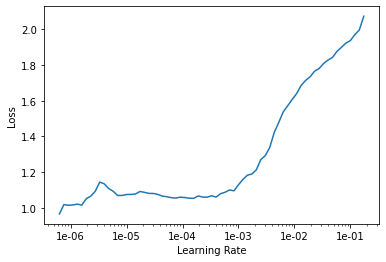

In [10]:
learn_bt.recorder.plot()

In [11]:
#lrs=slice(1e-04,3e-04)
lrs=slice(1e-05,3e-04)

In [12]:
#learn_bt.fit_one_cycle(15, lrs)
learn_bt.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,error_rate,time
0,0.875121,0.694687,0.235294,01:40
1,0.807810,0.622674,0.212937,01:40
2,0.731262,0.549600,0.184502,01:40
3,0.571201,0.472683,0.148470,01:40
4,0.473678,0.416274,0.134361,01:39
5,0.337502,0.355894,0.109399,01:39
6,0.254002,0.332506,0.099848,01:39
7,0.233906,0.321689,0.093119,01:39
8,0.123633,0.302904,0.084437,01:41
9,0.118128,0.306955,0.087693,01:40


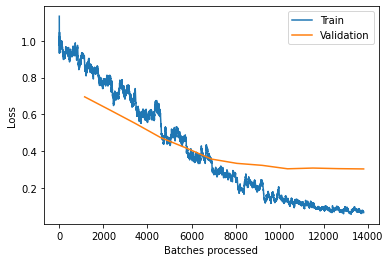

In [13]:
learn_bt.recorder.plot_losses()

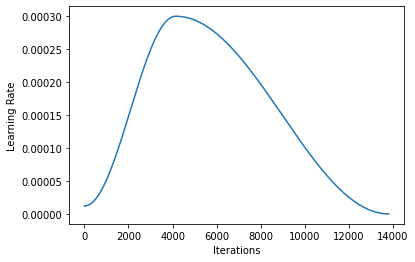

In [14]:
learn_bt.recorder.plot_lr()

In [15]:
learn_bt.save('stage-2')

In [16]:
#learn_bt.load('stage-2')

# Interpretation

In [17]:
#learn_bt.load('stage-2')

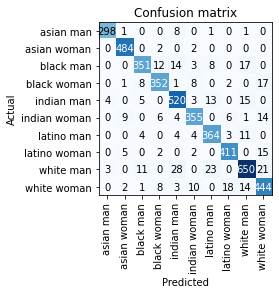

In [19]:
interp = ClassificationInterpretation.from_learner(learn_bt)
interp.plot_confusion_matrix()

# Crop Face of LinkedIn Profile Images

In [22]:
import cv2
import sys

In [28]:
import face_recognition

#image = face_recognition.load_image_file('/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/*.jpeg')
#face_locations = face_recognition.face_locations(image)

In [49]:
import glob
types = ('*.jpeg', '*.jpg','*.png') # the tuple of file types
files_grabbed = []
for files in types:
    files_grabbed.extend(glob.glob('/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/*'+ files))

# files_grabbed is the list of pdf and cpp files

In [50]:
files_grabbed
# type(files_grabbed) is list

['/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Frances Yang.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Daniel Parrillo.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Martin Barrientos.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Alejo Pijuan.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Brandon Valencia.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Joanna Pyra.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Tiffany Zheng.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Bebby Sesido.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Shaheen Alemi.jpeg',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Guhan Sundar.png',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Ryan Johnson.png',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Vida Powell.png',
 '/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages/Gideon Nna

In [51]:
len(files_grabbed)

30

In [52]:
import face_recognition
Image_list=[]
Image_list_face_locations=[]
for files_grabbed_path in files_grabbed:
    image = face_recognition.load_image_file(files_grabbed_path)
    face_locations = face_recognition.face_locations(image)
    Image_list.append(image)
    Image_list_face_locations.append(face_locations)

In [53]:
 Image_list #consisted of array 

In [54]:
Image_list_face_locations #face location of each image

[[(153, 296, 282, 167)],
 [(112, 349, 379, 82)],
 [(46, 100, 108, 38)],
 [(38, 196, 113, 121)],
 [(77, 345, 263, 159)],
 [(67, 210, 196, 81)],
 [(202, 304, 356, 150)],
 [(142, 365, 365, 142)],
 [(116, 270, 270, 115)],
 [(53, 142, 115, 80)],
 [(56, 155, 146, 66)],
 [(24, 196, 153, 67)],
 [(59, 149, 122, 87)],
 [(47, 146, 121, 71)],
 [(46, 126, 136, 36)],
 [(47, 162, 121, 88)],
 [(38, 154, 113, 79)],
 [(56, 155, 146, 66)],
 [(82, 468, 350, 200)],
 [(66, 145, 156, 56)],
 [(55, 129, 130, 55)],
 [(44, 151, 152, 44)],
 [(38, 154, 113, 79)],
 [(66, 145, 156, 56)],
 [(86, 155, 176, 66)],
 [(36, 165, 126, 76)],
 [(66, 145, 156, 56)],
 [(66, 175, 156, 86)],
 [(44, 151, 152, 44)],
 [(56, 155, 146, 66)]]

In [59]:
import numpy as np
import PIL
from PIL import Image as PIL_Image

print("I found {} face(s) in this photograph.".format(len(Image_list_face_locations)))

toplist=[]
rightlist=[]
bottomlist=[]
leftlist=[]
#for face_location in face_locations:
for face_location in Image_list_face_locations:
    
    # Print the location of each face in this image
    toplist.append(face_location[0][0])
    rightlist.append(face_location[0][1])
    bottomlist.append(face_location[0][2])
    leftlist.append(face_location[0][3]) 
    #print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))


I found 30 face(s) in this photograph.


In [60]:
CroppedFace=[]
for i in range(len(Image_list)):
    # You can access the actual face itself like this:
    face_image = Image_list[i][toplist[i]:bottomlist[i], leftlist[i]:rightlist[i]]
    pil_image = PIL_Image.fromarray(face_image) #type(pil_image) is PIL.Image.Image
    CroppedFace.append(pil_image)
    
    #plt.imshow(pil_image)  # graph it
    #pil_image.show()

In [61]:
Copy_to_path='/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages_CroppedFace/'
d=0

for face in range(len(CroppedFace)):    
    filename = "/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages_CroppedFace/file_%d.jpeg"%d
    CroppedFace[d].save(filename) 
    #cv2.imwrite(filename, frame)
    d+=1

In [68]:
CroppedFace

[<PIL.Image.Image image mode=RGB size=129x129 at 0x2AAAD6EA56D8>,
 <PIL.Image.Image image mode=RGB size=267x267 at 0x2AAAD6EA5748>,
 <PIL.Image.Image image mode=RGB size=62x62 at 0x2AAAD9054AC8>,
 <PIL.Image.Image image mode=RGB size=75x75 at 0x2AAAD9054B70>,
 <PIL.Image.Image image mode=RGB size=186x186 at 0x2AAAD9054978>,
 <PIL.Image.Image image mode=RGB size=129x129 at 0x2AAAD90544A8>,
 <PIL.Image.Image image mode=RGB size=154x154 at 0x2AAAD9054320>,
 <PIL.Image.Image image mode=RGB size=223x223 at 0x2AAAD90546A0>,
 <PIL.Image.Image image mode=RGB size=155x154 at 0x2AAAD9054F98>,
 <PIL.Image.Image image mode=RGB size=62x62 at 0x2AAAD9054588>,
 <PIL.Image.Image image mode=RGB size=89x90 at 0x2AAAD9054550>,
 <PIL.Image.Image image mode=RGB size=129x129 at 0x2AAAD90542E8>,
 <PIL.Image.Image image mode=RGB size=62x63 at 0x2AAAD9054438>,
 <PIL.Image.Image image mode=RGB size=75x74 at 0x2AAAD90549E8>,
 <PIL.Image.Image image mode=RGB size=90x90 at 0x2AAAD9054128>,
 <PIL.Image.Image image 

# Put Model in Production

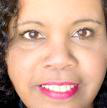

In [153]:
im = open_image('/CCAS/home/jialu/coursev3/nbs/dl1/divercity/testimages_CroppedFace/file_28.jpeg')
im

In [154]:
pred_class,pred_idx,outputs = learn_bt.predict(im)

pred_class.obj

'black woman'